# Course End Project:  Lending Club Loan Data Analysis / A deep learning prediction model.

#  TASKS  

1.     Feature Transformation
●	Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering
●	You will check the correlation between features and will drop those features which have a strong correlation
●	This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling
●	After applying EDA and feature engineering, you are now ready to build the predictive models
●	In this part, you will create a deep learning model using Keras with Tensorflow backend



#  METHODOLOGY 

1) Carryout EDA to Understand Data
2) Preprocessing: Lab
3) Build a Logistic Model- which will be used as a baseline for comparing NNW model
4) Build a NNW model
5) Optimise the NNW model Hyperparameters with GridSearch
6) Rebuild the model with best hyperparameters
7) Deploy the model

## 1.   IMPORT VARIOUS  LIBRARIES

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from math import floor,ceil
import datetime



## 2.  IMPORT  DATA SET  AND  SAMPLING

In [2]:
df = pd.read_csv('loan_data.csv')
df.head().T
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

##  3.  FEATURE  ENGINEERING 

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['purpose'])
le.transform(df['purpose'])
le.classes_

df['purpose'] = le.fit_transform(df['purpose'])


In [4]:
df.head().T

0             1            2             3  \
credit.policy          1.000000      1.000000     1.000000      1.000000   
purpose                2.000000      1.000000     2.000000      2.000000   
int.rate               0.118900      0.107100     0.135700      0.100800   
installment          829.100000    228.220000   366.860000    162.340000   
log.annual.inc        11.350407     11.082143    10.373491     11.350407   
dti                   19.480000     14.290000    11.630000      8.100000   
fico                 737.000000    707.000000   682.000000    712.000000   
days.with.cr.line   5639.958333   2760.000000  4710.000000   2699.958333   
revol.bal          28854.000000  33623.000000  3511.000000  33667.000000   
revol.util            52.100000     76.700000    25.600000     73.200000   
inq.last.6mths         0.000000      0.000000     1.000000      1.000000   
delinq.2yrs            0.000000      0.000000     0.000000      0.000000   
pub.rec                0.000000      0.000000     0.000000      0.000000   
not.fully.paid         0.000000      0.000000     0.000000      0.000000   

                             4  
credit.policy         1.000000  
purpose               1.000000  
int.rate              0.142600  
installment         102.920000  
log.annual.inc       11.299732  
dti                  14.970000  
fico                667.000000  
days.with.cr.line  4066.000000  
revol.bal          4740.000000  
revol.util           39.500000  
inq.last.6mths        0.000000  
delinq.2yrs           1.000000  
pub.rec               0.000000  
not.fully.paid        0.000000

# 4.  EDA

In [5]:
df.shape

(9578, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### 4.0   Understand the Composition of   'credit.policy' 

In [ ]:
df['credit.policy'].value_counts()


### 4.1   Understand the Composition of Feature 'purpose'

In [7]:
df['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

### 4.2   Verify if  'inq.last.6mths' data is Boolean

In [8]:
df['inq.last.6mths'].value_counts()

0     3637
1     2462
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
15       9
13       6
14       6
18       4
16       3
24       2
19       2
17       2
27       1
28       1
25       1
32       1
20       1
33       1
31       1
Name: inq.last.6mths, dtype: int64

inq.last.6mths' data is NOT Boolean

### 4.3   Verify if  'delinq.2yrs' data is Boolean

In [9]:
df['delinq.2yrs'].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
13       1
11       1
8        1
Name: delinq.2yrs, dtype: int64

'delinq.2yrs' data is NOT Boolean

### 4.4   Verify if  'pub.rec' data is Boolean

In [10]:
df['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
5       1
4       1
Name: pub.rec, dtype: int64

'pub.rec' data is NOT Boolean

## Graphical EDA 

###  4.5   Client Purpose  For Loan Credit

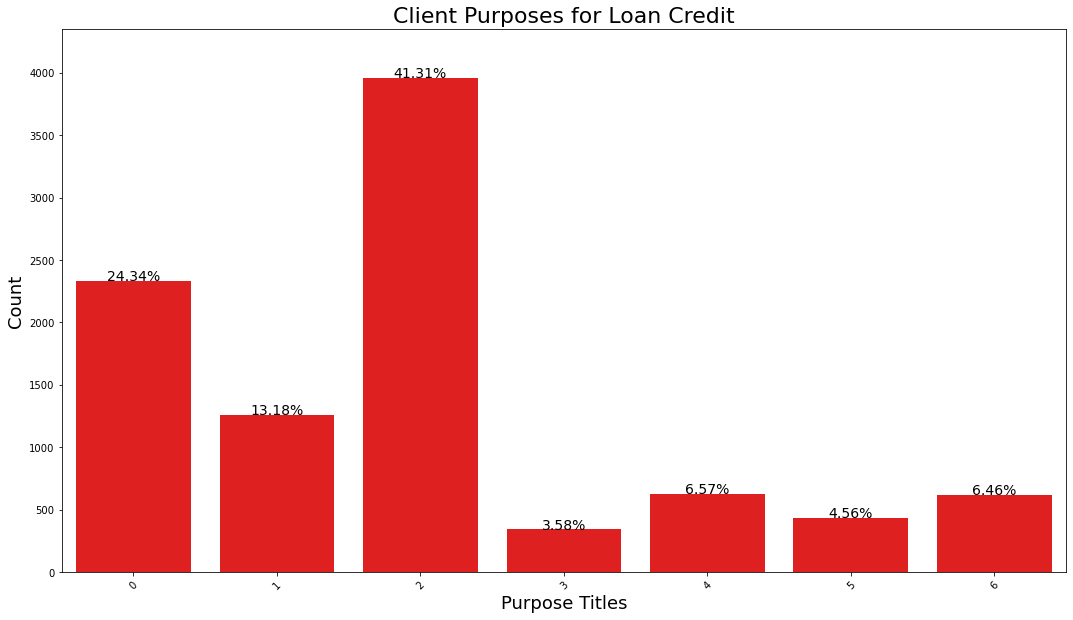

In [11]:
total = len(df)

plt.figure(figsize=(18,10))

g = sns.countplot(x='purpose', data=df, 
                  color='Red')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

41.31% of the Loans are to Debt Consolidation
24.34% are other 
13.18% are credit_card


###   4.6   Cross tab:  Not Fully paid Vs Purspose 

In [12]:
purp_loan= ['purpose', 'not.fully.paid']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[purp_loan[0]], df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

###  4.6   Cross tab:  Not Fully paid Vs Installement 

In [13]:
loan_grade = ['not.fully.paid', 'installment']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['installment'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

###  4.7   Cross tab:  Not Fully paid Vs Annual income

In [14]:
loan_grade = ['not.fully.paid', 'log.annual.inc']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['log.annual.inc'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

###  4.8   Not Fully Paid Distribution 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


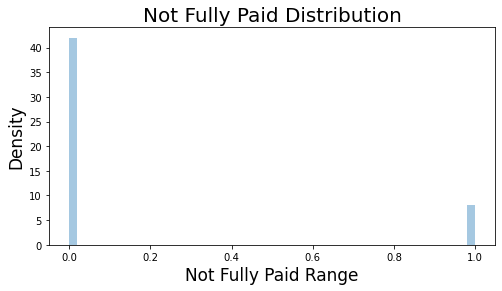

In [15]:
plt.figure(figsize=(8,4))

sns.distplot(df['not.fully.paid'])
plt.title("Not Fully Paid Distribution", fontsize=20)
plt.xlabel("Not Fully Paid Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

The above distribution is indicating of imbalance, which we will fathom deeper at alater stage.

###  4.9  Installement Distribution

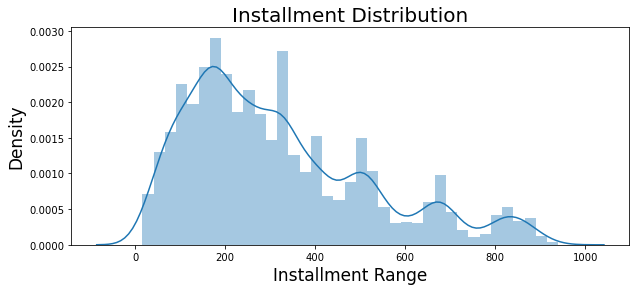

In [16]:
plt.figure(figsize=(10,4))

sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

 peak of our distribution is ~200 USD monthly.



###  4.10   Annual Income Distribution

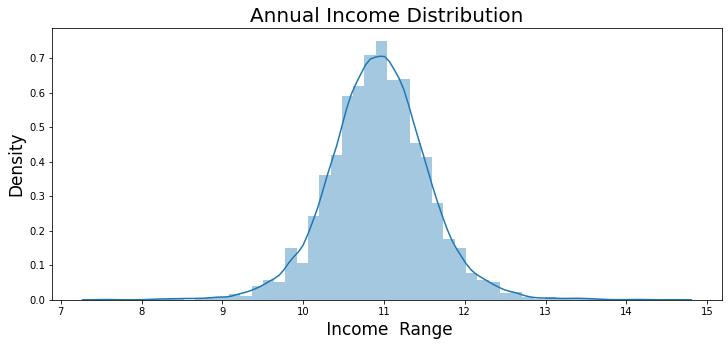

In [17]:
plt.figure(figsize=(12,5))

sns.distplot(df['log.annual.inc'])
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel(" Income  Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

###  4.11  Installment by Loan Status

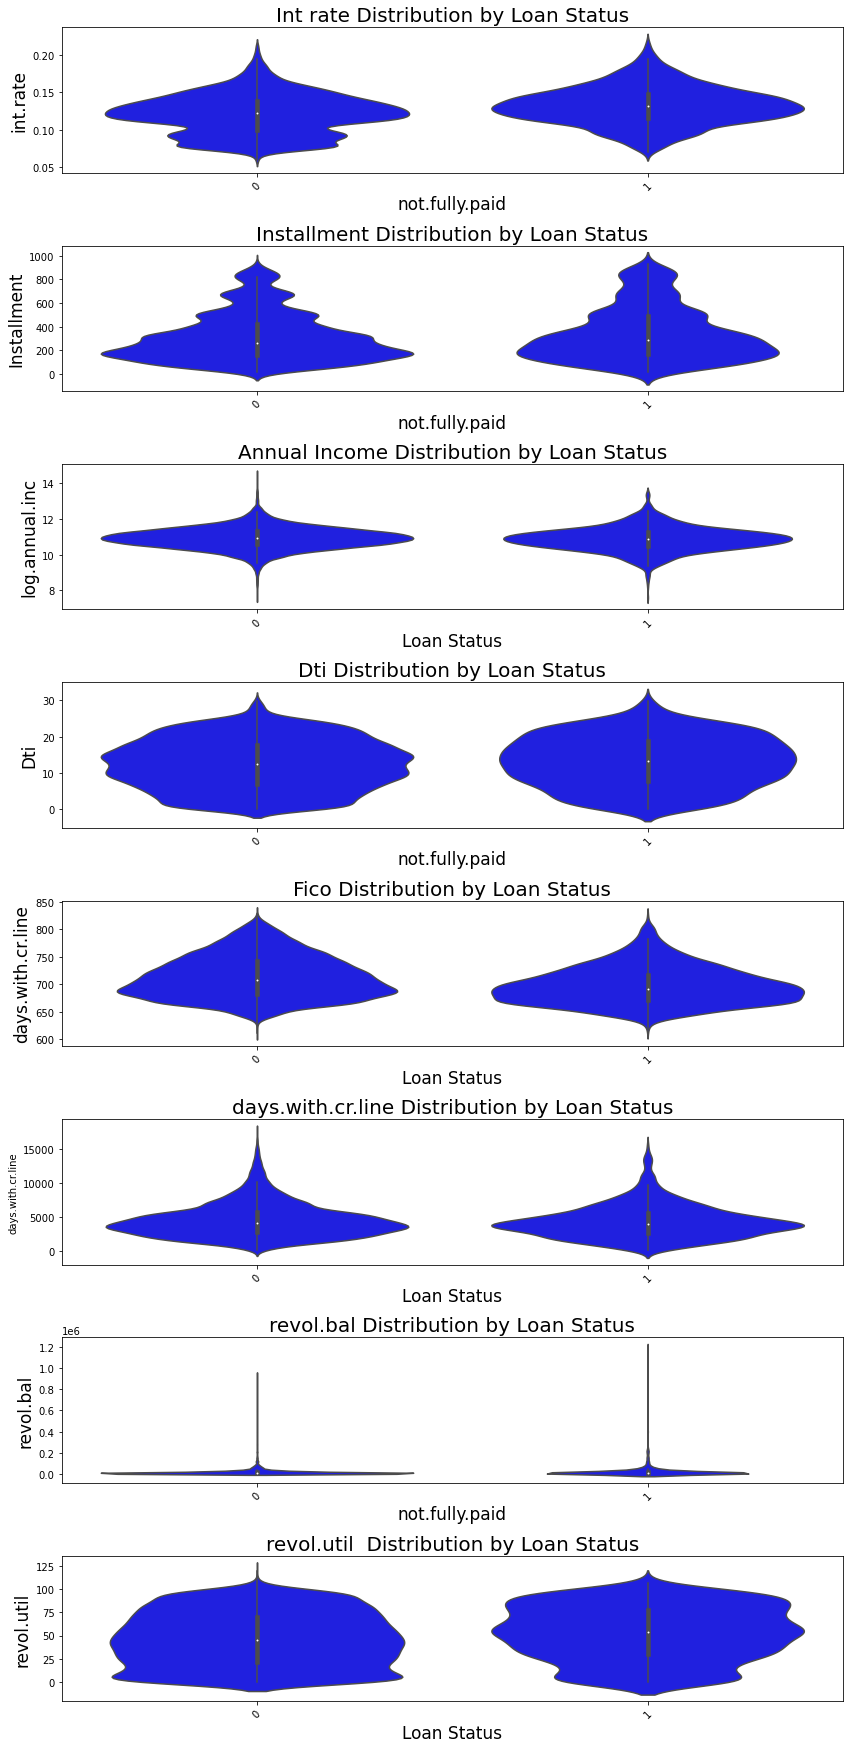

In [18]:
plt.figure(figsize = (14,30))


plt.subplot(811)
g1 = sns.violinplot(x='not.fully.paid', y="int.rate",
                   data=df, color='blue')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_xlabel("not.fully.paid", fontsize=17)
g1.set_ylabel("int.rate", fontsize=17)
g1.set_title("Int rate Distribution by Loan Status", fontsize=20)



plt.subplot(812)
g3 = sns.violinplot(x='not.fully.paid', y="installment",
                   data=df, color='blue')
g3.set_xticklabels(g.get_xticklabels(),rotation=45)
g3.set_xlabel("not.fully.paid", fontsize=17)
g3.set_ylabel("Installment", fontsize=17)
g3.set_title("Installment Distribution by Loan Status", fontsize=20)




plt.subplot(813)
g2 = sns.violinplot(x='not.fully.paid', y="log.annual.inc",
                   data=df, color='blue')
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status", fontsize=17)
g2.set_ylabel("log.annual.inc", fontsize=17)
g2.set_title("Annual Income Distribution by Loan Status", fontsize=20)



plt.subplot(814)
g5 = sns.violinplot(x='not.fully.paid', y="dti",
                   data=df, color='blue')
g5.set_xticklabels(g.get_xticklabels(),rotation=45)
g5.set_xlabel("not.fully.paid", fontsize=17)
g5.set_ylabel("Dti", fontsize=17)
g5.set_title("Dti Distribution by Loan Status", fontsize=20)



plt.subplot(815)
g6 = sns.violinplot(x='not.fully.paid', y="fico",
                   data=df, color='blue')
g6.set_xticklabels(g.get_xticklabels(),rotation=45)
g6.set_xlabel("Loan Status", fontsize=17)
g6.set_ylabel("fico", fontsize=17)
g6.set_title("Fico Distribution by Loan Status", fontsize=20)


plt.subplot(816)
g4 = sns.violinplot(x='not.fully.paid', y="days.with.cr.line",
                   data=df, color='blue')
g4.set_xticklabels(g.get_xticklabels(),rotation=45)
g4.set_xlabel("Loan Status", fontsize=17)
g6.set_ylabel("days.with.cr.line", fontsize=17)
g4.set_title("days.with.cr.line Distribution by Loan Status", fontsize=20)




plt.subplot(817)
g7 = sns.violinplot(x='not.fully.paid', y="revol.bal",
                   data=df, color='blue')
g7.set_xticklabels(g.get_xticklabels(),rotation=45)
g7.set_xlabel("not.fully.paid", fontsize=17)
g7.set_ylabel("revol.bal", fontsize=17)
g7.set_title("revol.bal Distribution by Loan Status", fontsize=20)



plt.subplot(818)
g8 = sns.violinplot(x='not.fully.paid', y="revol.util",
                   data=df, color='blue')
g8.set_xticklabels(g.get_xticklabels(),rotation=45)
g8.set_xlabel("Loan Status", fontsize=17)
g8.set_ylabel("revol.util", fontsize=17)
g8.set_title("revol.util  Distribution by Loan Status", fontsize=20)


plt.subplots_adjust(hspace = 0.5,top = 0.9)
plt.show()

##  5.   Correlation

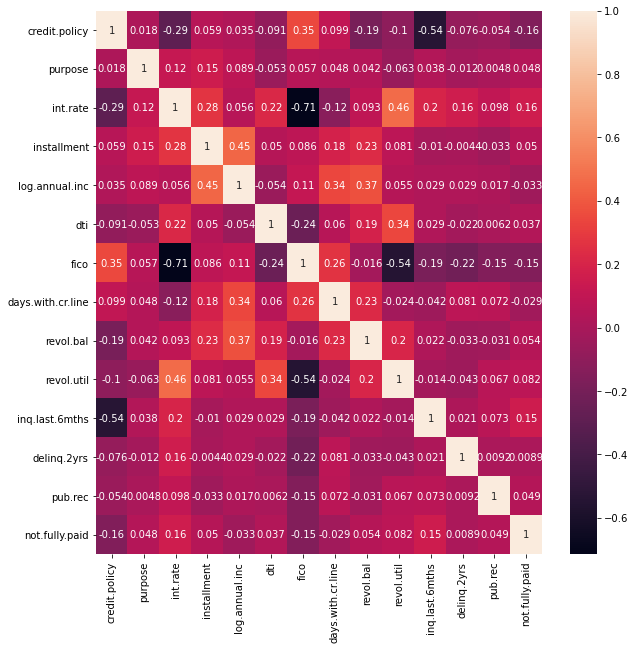

In [19]:
fig_size = (6, 4)
fig, ax = plt.subplots(figsize=(10,10) )


sns.heatmap(df.corr(),  ax=ax, annot=True)

'Fico' has a relatively strong correlation of 0.71, But not as strong as 0.9 or above. I choose not to drop it.

##  6.  Trainers and Targets

In [20]:
y = df.iloc[:,[-1]]
X = df.drop(columns=['not.fully.paid'])
X


credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
0                 1        2    0.1189       829.10       11.350407  19.48   
1                 1        1    0.1071       228.22       11.082143  14.29   
2                 1        2    0.1357       366.86       10.373491  11.63   
3                 1        2    0.1008       162.34       11.350407   8.10   
4                 1        1    0.1426       102.92       11.299732  14.97   
...             ...      ...       ...          ...             ...    ...   
9573              0        0    0.1461       344.76       12.180755  10.39   
9574              0        0    0.1253       257.70       11.141862   0.21   
9575              0        2    0.1071        97.81       10.596635  13.09   
9576              0        4    0.1600       351.58       10.819778  19.18   
9577              0        2    0.1392       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0      737        5639.958333      28854        52.1               0   
1      707        2760.000000      33623        76.7               0   
2      682        4710.000000       3511        25.6               1   
3      712        2699.958333      33667        73.2               1   
4      667        4066.000000       4740        39.5               0   
...    ...                ...        ...         ...             ...   
9573   672       10474.000000     215372        82.1               2   
9574   722        4380.000000        184         1.1               5   
9575   687        3450.041667      10036        82.9               8   
9576   692        1800.000000          0         3.2               5   
9577   732        4740.000000      37879        57.0               6   

      delinq.2yrs  pub.rec  
0               0        0  
1               0        0  
2               0        0  
3               0        0  
4               1        0  
...           ...      ...  
9573            0        0  
9574            0        0  
9575            0        0  
9576            0        0  
9577            0        0  

[9578 rows x 13 columns]

##  7.  Balancing

In [21]:
Default=df['not.fully.paid'].value_counts()

Percentage_Defaulted = (Default[0])*100/(Default[0]+Default[1])
print('Percentage_Defaulted :',   Percentage_Defaulted )

Percentage_Defaulted : 83.99457089162665


In [22]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

#oversample = RandomOverSampler(sampling_strategy=0.5)
#X_over, y_over = oversample.fit_resample(X, y)

X_ros.shape
y_ros.shape
y_ros.squeeze().value_counts()



1    8045
0    8045
Name: not.fully.paid, dtype: int64

Notice the classes are equal and can be considered as a balanced.

## 8. Split data to Train and Test 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3,random_state=42)
len(X_train)
len(X_test)

4827

## 9.  Scaling

###  9.1   Identify the features that requires Scaling and Those Reqire Noscalin 

In [25]:
# Columns that require Scaling
col_scale= ['purpose','installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs']


# Columns that require No Scaling
col_no_scale = ['credit.policy', 'int.rate', 'pub.rec']


###  9.2   Split The Data that requires Scaling and Those Reqire Noscalin

In [26]:
#Split the X_train that reqires scaling and that does not require scalling
X_train_Require_Scalling    = X_train[col_scale]
X_train_Require_No_Scalling = X_train[col_no_scale ]


### 9.3 Generate Mean and Deviation from train data, which will be used to scale  train and test data

In [27]:
mean = X_train_Require_Scalling.mean(axis=0)
std = X_train_Require_Scalling.std(axis=0)
mean

purpose                  2.022108
installment            330.620246
log.annual.inc          10.920385
dti                     12.910237
fico                   705.913700
days.with.cr.line     4529.299569
revol.bal            18684.788156
revol.util              49.351746
inq.last.6mths           1.877919
delinq.2yrs              0.164343
dtype: float64

In [28]:
std

purpose                  1.762579
installment            214.993657
log.annual.inc           0.634920
dti                      6.895020
fico                    37.073669
days.with.cr.line     2478.191287
revol.bal            41067.742394
revol.util              29.198296
inq.last.6mths           2.513984
delinq.2yrs              0.538089
dtype: float64

### 9.3  Scale X-Train 

In [29]:
#Scalling X_train

for i in range(len(col_scale)):
    col = col_scale[i]
    X_train_Require_Scalling [col] = ( (X_train_Require_Scalling[col] - mean[i]) / std[i]  )  

    
# Merging Scalled and UnScalled
X_train = pd.concat([X_train_Require_Scalling,  X_train_Require_No_Scalling], axis=1)    

<ipython-input-29-5eb61ab1d1b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_Require_Scalling [col] = ( (X_train_Require_Scalling[col] - mean[i]) / std[i]  )


###  9.4  Scale X-Test 

In [125]:
#Scalling X_test

#Split the X_test that reqires scaling and that does not require scalling
X_test_Require_Scalling = X_test[col_scale]
X_test_Require_No_Scalling = X_test[col_no_scale ]
X_test_Require_Scalling



# Scaling
for i in range(len(col_scale)):
    col = col_scale[i]
    X_test_Require_Scalling [col] = ( (X_test_Require_Scalling[col] - mean[i]) / std[i]  )  

    
    
    
# # Merging Scalled and UnScalled
X_test = pd.concat([X_test_Require_Scalling,  X_test_Require_No_Scalling], axis=1)    
len(X_test )


<ipython-input-125-deb5929a8d26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_Require_Scalling [col] = ( (X_test_Require_Scalling[col] - mean[i]) / std[i]  )


4827

##  10.   Logistic Regression  Model

In [52]:
# Build a logistic model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

#Test the model
normal_ypred = log_reg.predict(X_test)
print("Logistic Model Accuracy",  round(accuracy_score(y_test, normal_ypred),2))

Logistic Model Accuracy 0.62


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


##  11.   NNW  Model

In [32]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras import layers
from tensorflow.keras import initializers

### 11.1  Build a Keras Model

In [33]:
# FUNCTION  TO  CREATE  MODEL,   FOR  KERAS CLASSIFIER

def create_model(Layers=1, neurons=1, optimizer='SGD',learn_rate=0.01, momentum=0, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))  #Input layer
    L=int(Layers)
    while(Layers>1):
        Layers=Layers-1
        model.add(Dense(neurons, activation=activation))  # Adding more hidden layers Dynamically
    model.add(Dense(1, activation=activation))            # Output Layer
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# CREATE  MODEL
model = KerasClassifier(build_fn=create_model, verbose=0)


### 11.2  Hyperparameter Tuning With Grid serach 

In [34]:
# DEFINE  GRID SEARCH PARAMETERS

print("Grid Search Has Started- Please wait.\n")

start_gridSearch = datetime.datetime.now()
Best_score  = []
Params      = []

Max_Layers  = 11

# Build Layers Dynamically
for i in range(1, Max_Layers, 1):
    Layers     =  [i]
    neurons    =  [13,26,39]
    batch_size =  [20,40]
    epochs     =  [50,100]
    optimizer  =  ['SGD', 'adam' 'Adamax' 'RMSprop', 'Adagrad', 'Adadelta', 'SGD', 'Nadam']
    learn_rate =  [0.05, 0.1]
    momentum   =  [0.1, 0.2]
    activation =  ['softplus', 'softmax', 'relu', 'softsign',  'tanh', 'sigmoid', 'hard_sigmoid', 'linear']


    param_grid = dict(Layers = Layers,
                 neurons     = neurons,
                 batch_size  = batch_size, 
                 epochs      = epochs,
                 optimizer   = optimizer,
                 learn_rate  = learn_rate ,
                 momentum    = momentum,
                 activation  = activation )


    grid = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        n_jobs=-1, 
                        cv=3)
    
    
    
    grid_result = grid.fit(X_train, y_train)
    Best_score.append(grid_result.best_score_)
    Params.append(grid_result.best_params_)
    
    
   
    
    # summarize results
    print("Best Score:", round(grid_result.best_score_,2))
    print("Hyperparameters Used:\n", grid_result.best_params_)
    print("\n<<--------------------------------------------------------------------->>")
    
    
    
    
end_gridSearch = datetime.datetime.now()  
time_delta = (end_gridSearch - start_gridSearch)
total_seconds = time_delta.total_seconds()
minutes = total_seconds/60

print("\nGrid Search Start Time:", start_gridSearch)
print("Grid Search End Time:", end_gridSearch)
print("Total time taken for running the program (mins):", int(minutes) )

Grid Search Has Started- Please wait.

Best Score: 0.63
Hyperparameters Used:
 {'Layers': 1, 'activation': 'sigmoid', 'batch_size': 20, 'epochs': 50, 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 13, 'optimizer': 'Adagrad'}

<<--------------------------------------------------------------------->>
Best Score: 0.64
Hyperparameters Used:
 {'Layers': 2, 'activation': 'sigmoid', 'batch_size': 20, 'epochs': 50, 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 13, 'optimizer': 'SGD'}

<<--------------------------------------------------------------------->>
Best Score: 0.63
Hyperparameters Used:
 {'Layers': 3, 'activation': 'softplus', 'batch_size': 20, 'epochs': 50, 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 26, 'optimizer': 'Nadam'}

<<--------------------------------------------------------------------->>
Best Score: 0.64
Hyperparameters Used:
 {'Layers': 4, 'activation': 'softplus', 'batch_size': 20, 'epochs': 50, 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 13, 'optimizer': 'SGD'}


In [58]:
# Print Accuracy for various Layers

BEST_score = [round(num, 2) for num in Best_score]
print("Accuracy for Layers from 1 to 10:", BEST_score)

max_value = max(BEST_score)
max_index = BEST_score.index(max_value)
print("Best params:", Params[max_index])

Accuracy for Layers from 1 to 10: [0.63, 0.64, 0.63, 0.64, 0.64, 0.59, 0.63, 0.62, 0.65, 0.63]
Best params: {'Layers': 9, 'activation': 'softsign', 'batch_size': 20, 'epochs': 50, 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 13, 'optimizer': 'SGD'}


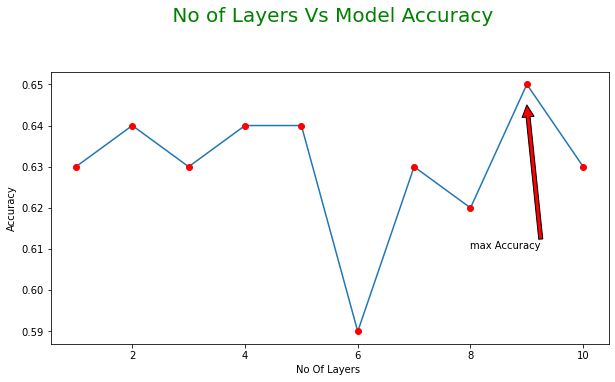

<Figure size 432x288 with 0 Axes>

In [50]:
x = list(range(1,Max_Layers,1))
y = BEST_score

plt.figure(figsize=(10,5))
plt.plot(x,y, marker = 'o', mec = 'r', mfc = 'r')
plt.xlabel('No Of Layers ')
plt.ylabel('Accuracy')

plt.annotate( 'max Accuracy',xytext=(8,0.61), xy=(9,0.645),arrowprops={'facecolor':'red'})
plt.title(label=" No of Layers Vs Model Accuracy", 
          fontsize=20, 
          color="green", 
          pad = 50) 

plt.savefig("No of Layers Vs Model Accuracy.png") 
plt.show()


##  Rebuild   and Deploy  the model with  obtained best  Hyper parameters 

In [130]:
BestParameters = Params[max_index]

Layers     =  BestParameters['Layers']
neurons    =  BestParameters['neurons']
optimizer  =  BestParameters['optimizer']
learn_rate =  BestParameters['learn_rate']
momentum   =  BestParameters['momentum']
activation =  BestParameters['activation']

model = Sequential()
model.add(Dense(neurons, input_dim=13, activation=activation))
L=int(Layers)
while(Layers>1):
    model.add(Dense(neurons, activation=activation)) 
    Layers=Layers-1
model.add(Dense(1, activation=activation))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print("mode:", model)






predictions = model.predict_classes(X_test)
predict_sample = predictions[0:10]
print("Predicted Classes:\n", predict_sample)


mode: <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002088F13D4F0>


C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted Classes:
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [131]:
actual = df['not.fully.paid'].head(10)
print("Actual classes from data set:\n", actual)

Actual classes from data set:
 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: not.fully.paid, dtype: int64


### Comapre Predicted and Actual 

The model predicts first 10 classes as Zero(Default). Whereas in actual data, the 6th and 7th classes are ones(not defulted) and the Rest are Zeros(Default). The objective of this comparison is just to demonstrate that the model predicts classes smoothly, without any errors. I would like to conclude that the model building, testing and deploying are satisfactory, with an accuracy of 65%.


# End Of the Project